In [1]:
# 데이터 구성 패키지: Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np
#데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale


#matplotlib 패키지 한글 깨짐 처리 시작
#한글 폰트 적용
matplotlib.rc('font', family='NanumGothic')
plt.rc('font', family = 'NanumGothic')
# seaborn에서 한글 깨짐 해결
plt.rcParams['axes.unicode_minus'] = False

In [2]:
#회귀분석
from statsmodels.formula.api import ols
#qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형모델 formula(y~ X1 + X2 +....)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import mse
# matplotlib 이용한 Background 그래프 실행 및 결과 확인


In [81]:
# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision tree
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV
# export_graphviz : 나무구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz: 나무 구조 시각화
import graphviz

# 예측/ 회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor as GBR

# 예측/ 회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor as RFR
#회귀분석
import statsmodels.formula.api as smf

#평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 회귀분석_예측

목표변수 FAT를 예측하기 위한 파생변수(BMI 등)를  생성하여 회귀분석을 실시하고 결과를 해석하라.  
(BMI 계산 시, WEIGHT 단위는 pound(1lb->0.45kg),HEIGHT 단위는 inch(1inch->2.54cm)이므로 변환하여 사용할 것)  
데이터 : 체질검사.CSV(변수: 14, 자료 수: 252개)


In [5]:
#  engine: 파일명 또는 데이터에 한글 포험 -> 'python'
df_raw = pd.read_csv("./data/체질검사.csv", engine = 'python')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FAT      252 non-null    float64
 1   AGE      252 non-null    int64  
 2   WEIGHT   252 non-null    float64
 3   HEIGHT   252 non-null    float64
 4   NECK     252 non-null    float64
 5   CHEST    252 non-null    float64
 6   ABDOMEN  252 non-null    float64
 7   HIP      252 non-null    float64
 8   THIGH    252 non-null    float64
 9   KNEE     252 non-null    float64
 10  ANKLE    252 non-null    float64
 11  BICEPS   252 non-null    float64
 12  FOREARM  252 non-null    float64
 13  WRIST    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


In [8]:
# 파생변수(BMI)를 생성해준다.
df_raw['BMI'] = 10000*(df_raw['WEIGHT']*0.45)/(df_raw['HEIGHT']*2.54)**2
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165


새로 추가해준 파생변수 BMI를 포함한 체질검사 데이터에서 체질 비만도를 예측하기 위한 회귀분석을 실시한다.

### * 변수 간의 경향성 파악- 그래프 분석

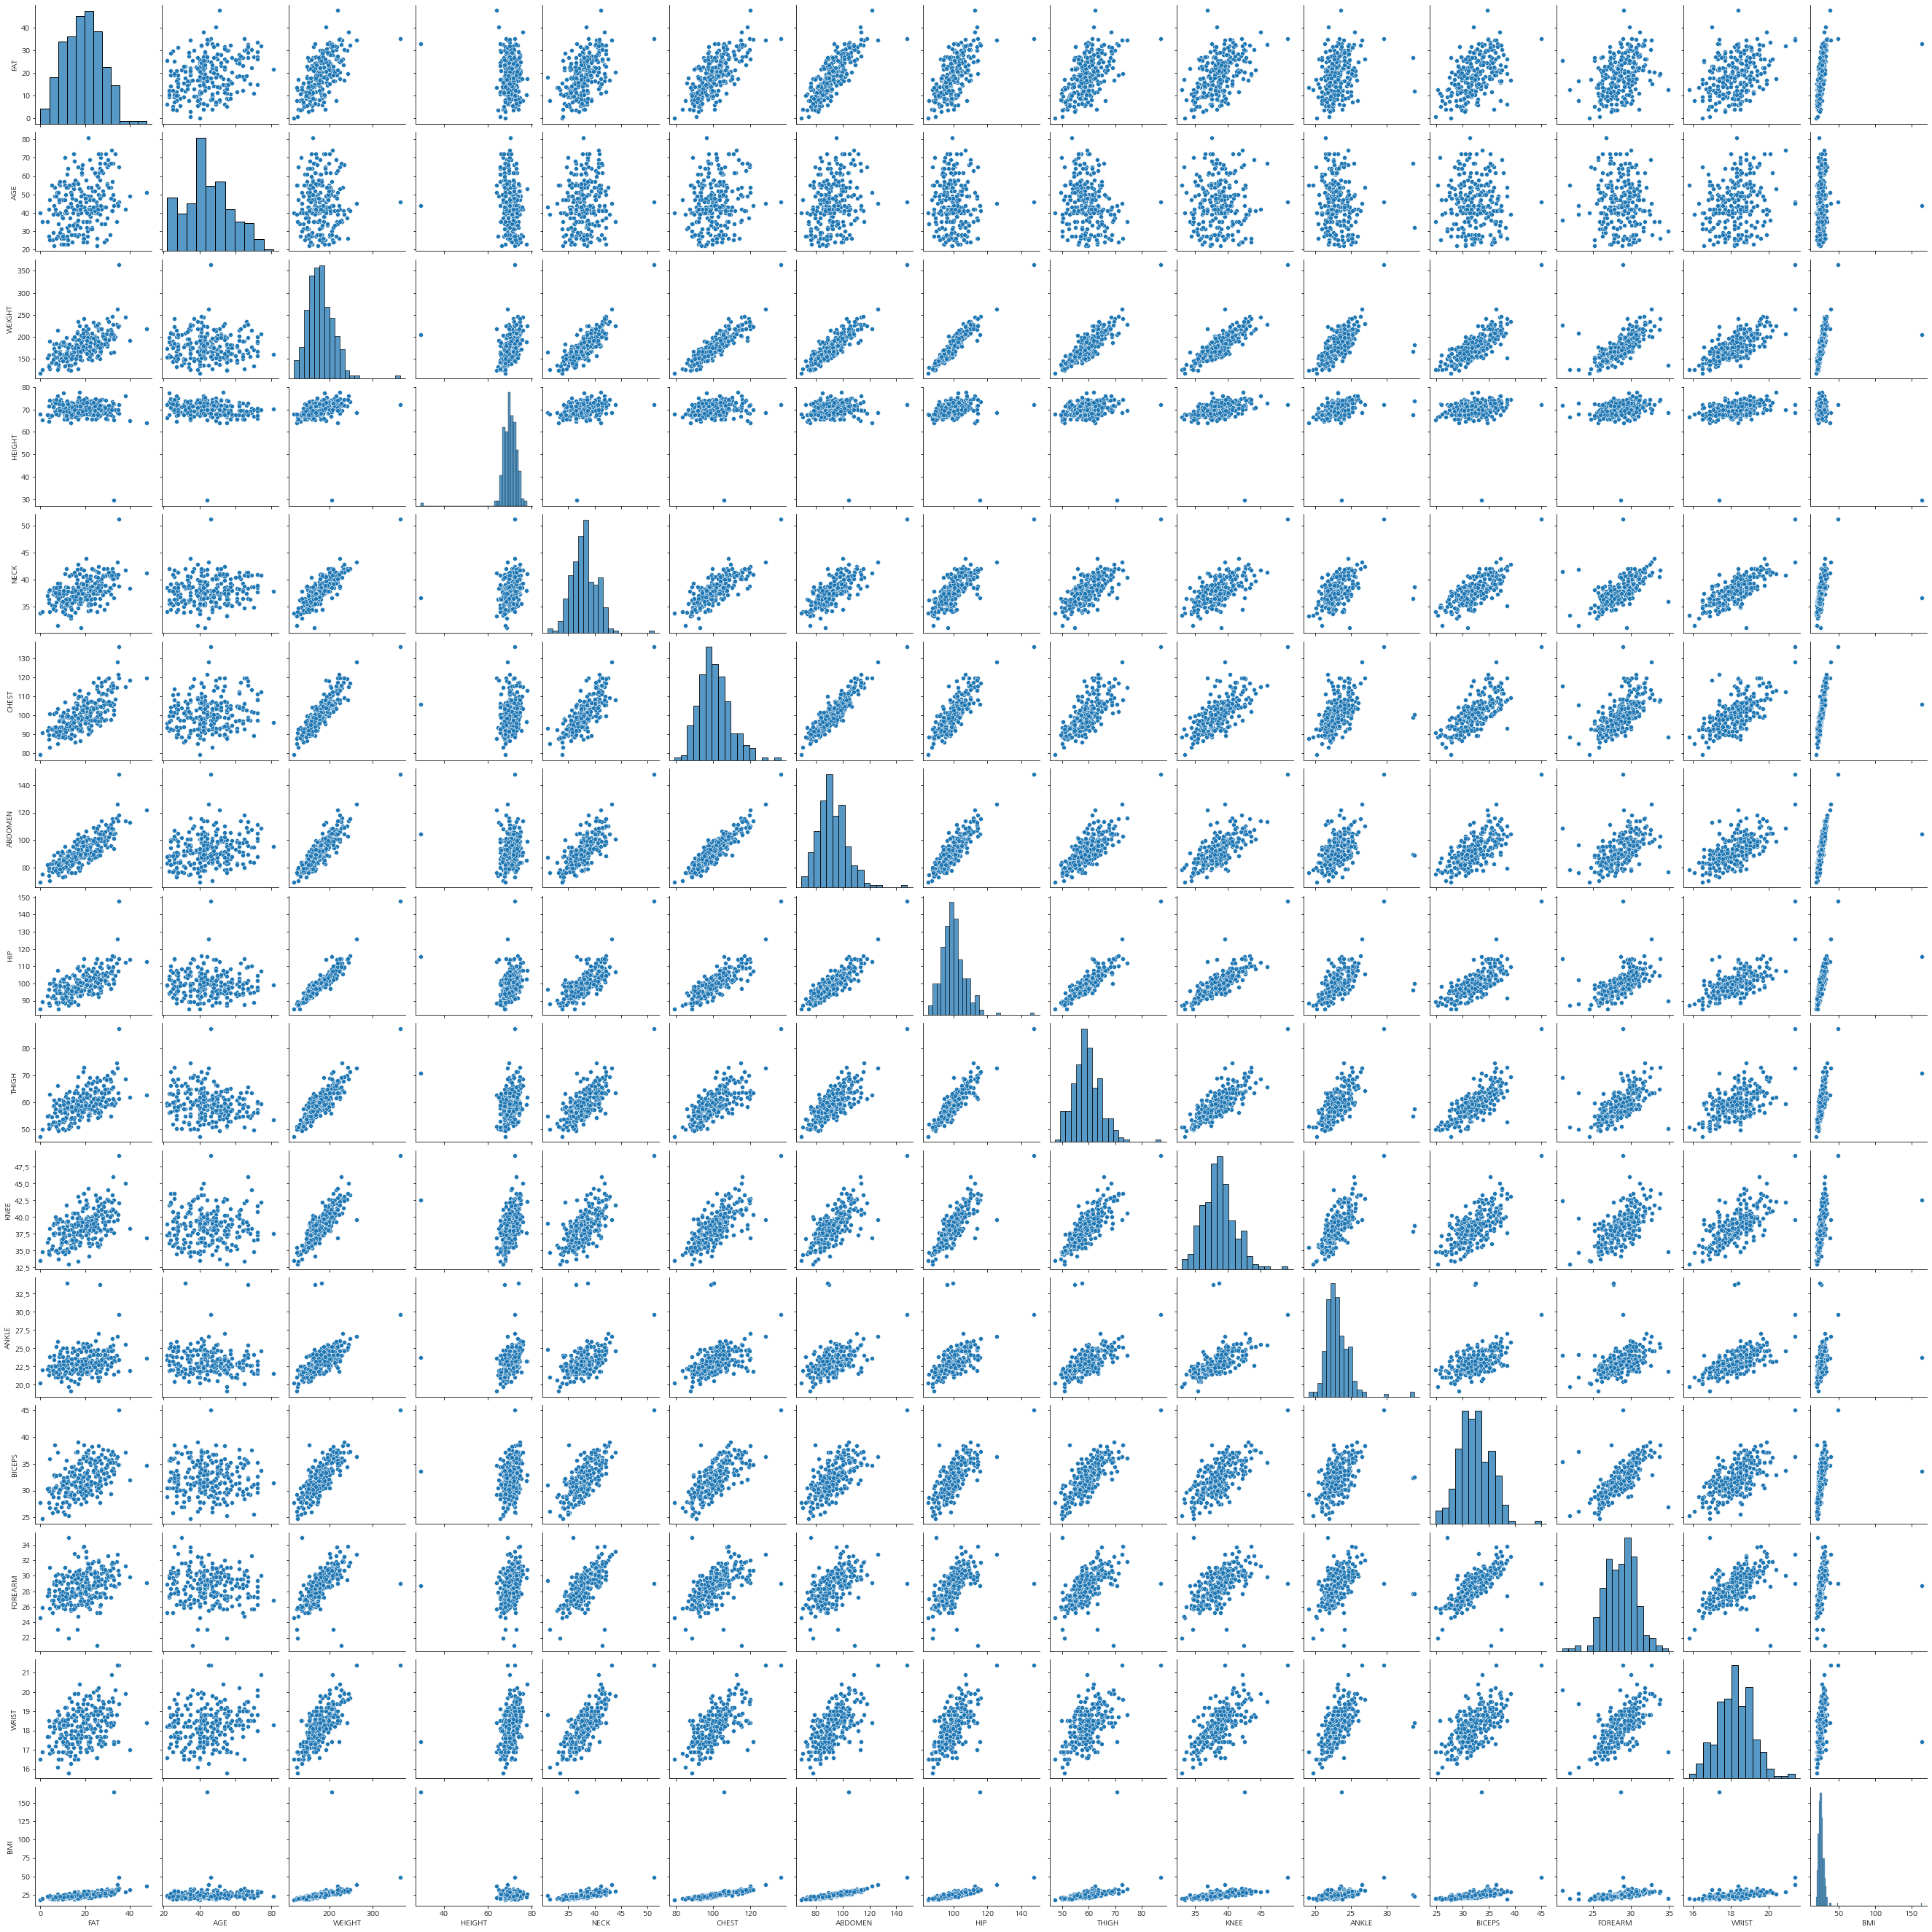

In [10]:
# 산점도 행렬 : 전체 숫자형 변수
sns.pairplot(df_raw)

목표변수(FAT)과 연관된 설명변수가 확인된다.  
설명변수간의 선형관계 확인(몸무게, 목 둘레, 가슴둘레등) -> 설명변수 간의 다중공선성 처리 필요하다.

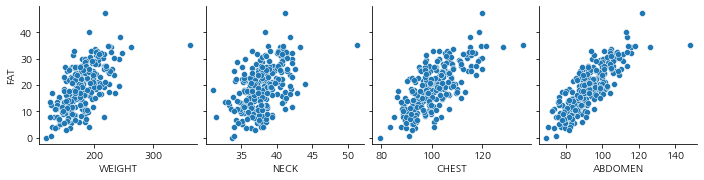

In [15]:
# 산점도 행렬: 목표변수와 설명변수 지정. kind = "scatter" | "reg"
sns.pairplot(df_raw, y_vars="FAT", x_vars=["WEIGHT", "NECK","CHEST","ABDOMEN"], diag_kind = None)

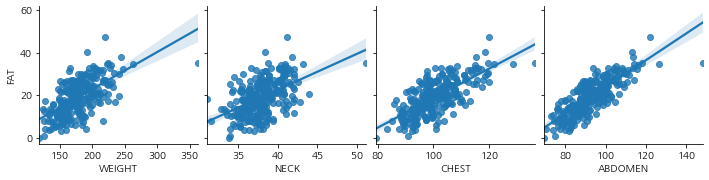

In [14]:
sns.pairplot(df_raw, y_vars="FAT", x_vars=["WEIGHT", "NECK","CHEST","ABDOMEN"], kind = "reg", diag_kind = None)

※ 산점도에서 목표변수(체질, 비만도, FAT)와 다수설명변수간의 선형관계 확인, 이상치 확인
* 이상치 처리 검토 및 적절한 설명변수 선택 필요
* 목표변수(FAT)와 선형관계가 있는 설명변수 확인됨
* 설명변수 간의 선형관계 확인 됨: 몸무게, 목둘레 ,가슴둘레, BMI등
    -> 설명변수 간의 다중공선성 처리필요

In [13]:
# 상관관계 분석
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,0.371
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,0.040
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,0.391
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,-0.638
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.266
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,0.383
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,0.415
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,0.462
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,0.433
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,0.364


-> FAT과 CHEST, ABODOMEN 높은 선형관계 확인  
-> 설명변수간의 선형관계 확인 (ABDOMEN,NECK,CHEST) -> 다중 공선성 확인 및 처리 필요

### * 회귀 모델 생성: 설명변수 전체

In [17]:
# 선형 회귀 분석: formula 이용, 상수항 자동 추가
# 모델 (생성)
formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
KNEE + ANKLE + BICEPS + FOREARM + WRIST+ BMI"
reg_model = smf.ols(formula, data = df_raw)

# 모델 ( 적합)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     50.56
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           5.49e-63
Time:                        20:44:50   Log-Likelihood:                -718.19
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     237   BIC:                             1519.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.2460     24.500     -0.990      0.3

->  P값이 5.49e-63로 유의수준 0.05보다 작으므로 회귀모델로서 유의하다.  
-> 보정 설명력: 0.734  
-> 회귀계수 검정:ABDOMEN, HIP, THIGH, FOREARM, WRIST는 p값이 유의수준 0.05보다 작으므로 유의

### * 설명변수 간의 다중공선성 확인

In [18]:
# 설명변수 데이터 생성
df_raw_x = df_raw.drop("FAT", axis = 1)

# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

#VIF 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
10,ANKLE,1.922
12,FOREARM,2.196
1,AGE,2.251
13,WRIST,3.378
11,BICEPS,3.674
4,NECK,4.456
9,KNEE,4.815
14,BMI,7.432
8,THIGH,8.010
3,HEIGHT,9.146


-> 몸무게와 엉덩이의 VIF가 높게 나타남  
-> 변수 특성, 영향을 고려하여 모델에서 제외 검토

In [19]:
# 선형 회귀 분석: formula 이용, 상수항 자동 추가
# 모델 (생성) WEIGHT 변수 제거
formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
KNEE + ANKLE + BICEPS + FOREARM + WRIST"
reg_model = smf.ols(formula, data = df_raw)

# 모델 ( 적합)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     58.55
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           3.75e-64
Time:                        20:50:50   Log-Likelihood:                -719.69
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     239   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5453      7.672      0.984      0.3

In [20]:
# 다중공선성 높은 변수 제거 후 공선성 재확인
df_raw_x = df_raw.drop(["FAT","WEIGHT"], axis = 1)

# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

#VIF 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
9,ANKLE,1.847
11,FOREARM,2.196
1,AGE,2.196
12,WRIST,3.327
10,BICEPS,3.507
3,NECK,3.962
2,HEIGHT,4.665
13,BMI,4.729
8,KNEE,4.788
7,THIGH,7.837


다중공선성 문제가 거의 해결된것을 알 수 있다.

### * 후진제거법을 이용한 변수 선택

In [21]:
# RFE 함수: 입력된 모델을 이용항여 변수중요도가 낮은 순으로 순차적으로 제거
# 목표 변수 분리
df_raw_y = df_raw["FAT"]
# sklearn의 선형회귀모델
model = LinearRegression()

# 전체 변수중 5개의 변수가 남을 때 까지 변수 선택
rfe = RFE(estimator=model, n_features_to_select=5).fit(df_raw_x, df_raw_y)
#선택된 변수
selected_cols = df_raw_x.columns[rfe.support_]
# 제거된 변수
removed_cols =  df_raw_x.columns[~rfe.support_]

print("Selected Variables: {}".format(selected_cols))
print("Removed Variables: {}".format(removed_cols))

Selected Variables: Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables: Index(['AGE', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'BMI'], dtype='object')


-> 목 둘레, 복부 둘레, 엉덩이 둘레, 팔뚝 둘레 , 손목 둘레를 변수 선택

In [22]:
#### STEP4 후진제거법을 이용한 변수 선택 및 모델 설정
formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST"
rfe_reg_model = smf.ols(formula, data = df_raw)

# 모델 ( 적합)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           4.38e-68
Time:                        20:59:08   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

-> 모든 변수들의 p-value들이 0.05보다 작으므로 통계적으로 유의미 하다.  
->설명력은 떨어진 것은 변수들이 제외되서 이다.

### * 후진제거법을 이용한 변수 선택- 선택된 설명변수의 다중공선성 재진단

In [23]:
# 후진제거법에 의하여 선택된 데이터
df_raw_x_rfe = df_raw_x[selected_cols]
df_raw_x_rfe_const = add_constant(df_raw_x_rfe)

# 다중공선성 저장
df_rfe_vif = pd.DataFrame()
df_rfe_vif["variable"] = df_raw_x_rfe_const.columns
df_rfe_vif["VIF"] = [variance_inflation_factor(df_raw_x_rfe_const.values,i) for i in range(df_raw_x_rfe_const.shape[1])]

#VIF 정렬
df_rfe_vif.sort_values("VIF", inplace = True)
df_rfe_vif.round(3)

,variable,VIF
4,FOREARM,1.769
5,WRIST,2.430
1,NECK,3.565
3,HIP,4.662
2,ABDOMEN,4.818
0,const,509.235


### * 결론 도출

y = 2.7307-0.6012NECK + 0.9743 ABDOMEN-0.3316 HIP + 0.4095 FOREARM-1.6180 WRIST  
* 변수 중요도 확인: 비표준화회귀계수 기준

<AxesSubplot:>

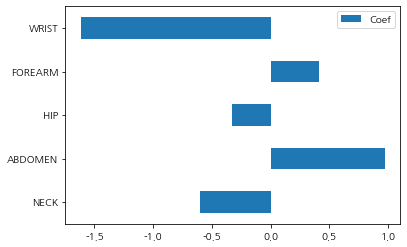

In [24]:
# 설명변주 중요도 (표준화 적용 이전) -> 표준화 회귀계수 산출해야 함
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]},\
                          index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = True)

-> 손목 두께가 얇을 수록, 체질 비만도가 높음  
-> 복부 둘레가 커질수록 비만도가 높음

### * 설명변수에 표준화 적용

In [25]:
# 설명변수 표준화 적용 -> 표준화 회귀계수 산출 목적
scaler = StandardScaler()

# Scale 변환대상 변수: 일반적으로 설명변수
cols = df_raw_x.columns

# Scale 변환
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(np_scaled, columns= cols)

# 목표 변수 추가
df_scaled["FAT"] = df_raw["FAT"]
reg_model_scaled = smf.ols(formula = 'FAT ~ NECK + ABDOMEN + HIP +FOREARM\
+ WRIST', data = df_scaled)

reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           4.38e-68
Time:                        21:02:44   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

<AxesSubplot:>

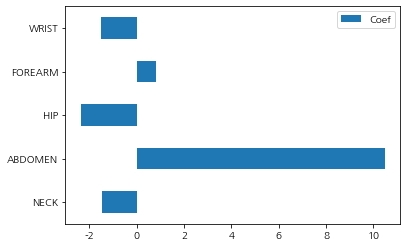

In [26]:
# 설명변수 중요도 (표준화 후)
df_reg_scaled_coef = pd.DataFrame({"Coef": reg_result_scaled.params.values[1:]},\
                          index = selected_cols)
df_reg_scaled_coef.plot.barh(y = "Coef", legend = True)

-> 회귀 계수의 방향을 동일하나 중요도 크기가 변환  
복부둘레가 가장 중요하고 손목 두께의 중요돈는 줄어든 반면 엉덩이 변수의 중요도가 증가함  
단, 모델의 통계량을 변화가 없음

# 의사결정나무_예측

콘크리트 강도를 예측하는 의사결정나무 모델을 만들고 predict method를 이용하여 예측값을 구하라.  
그리고 모델의 mse와 mae를 산출하여 비교하라.   
데이터 : Concrete.CSV(변수: 9개, 자료 수: 1,030개)  
 -.목표변수(strength)


※ 데이터는 (train(0.6) : test(0.4) )의 비율로 분할 (train_test_split 활용)  
 1. train 데이터: 모델 훈련   
 2. test 데이터: 1에서 개발한 모델의 성능 평가  


In [27]:
#  engine: 파일명 또는 데이터에 한글 포험 -> 'python'
df_raw = pd.read_csv("./data/Concrete.csv", engine = 'python')
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [28]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw["strength"]
df_raw_x = df_raw.drop("strength", axis = 1, inplace = False)

### * 데이터 분할 (train, test 데이터 6:4 비율로 분할)

In [31]:
# train_test_split (X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x,df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4 , random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (618, 8)
train data Y size : (618,)
test data X size : (412, 8)
test data Y size : (412,)


### * 기본 옵션으로 모델 생성

In [32]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.996
Score on test set: 0.790


※ train데이터는 설명력은 99.6% , test 데이터의 설명력도 높은 모습을 보여준다.

### * min_sample_leaf: 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [33]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []
# min_samples_leaf: 잎사귀 최소 자료수
para_leaf = [n_leaf* 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [34]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.996,0.790
1,2,0.978,0.783
2,3,0.959,0.786
3,4,0.943,0.796
4,5,0.934,0.811
5,6,0.920,0.810
6,7,0.909,0.799
7,8,0.900,0.792
8,9,0.877,0.817
9,10,0.868,0.816


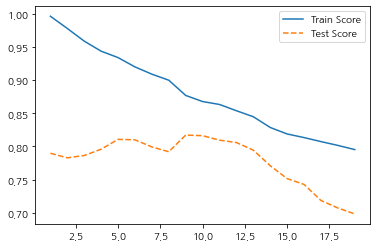

In [35]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label ="Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label ="Test Score")
plt.legend()

-> 잎사귀 노드 최소 자료 수 증가에 따라 모델의 설명력은 감소하며  
-> Train/Test 데이터의 성능 변화를 고려하여 5 선택  
-> Test 데이터의 성능 변화를 고려하면 9 선택 가능하나 train 데이터의 성능이 많이 저하됨  

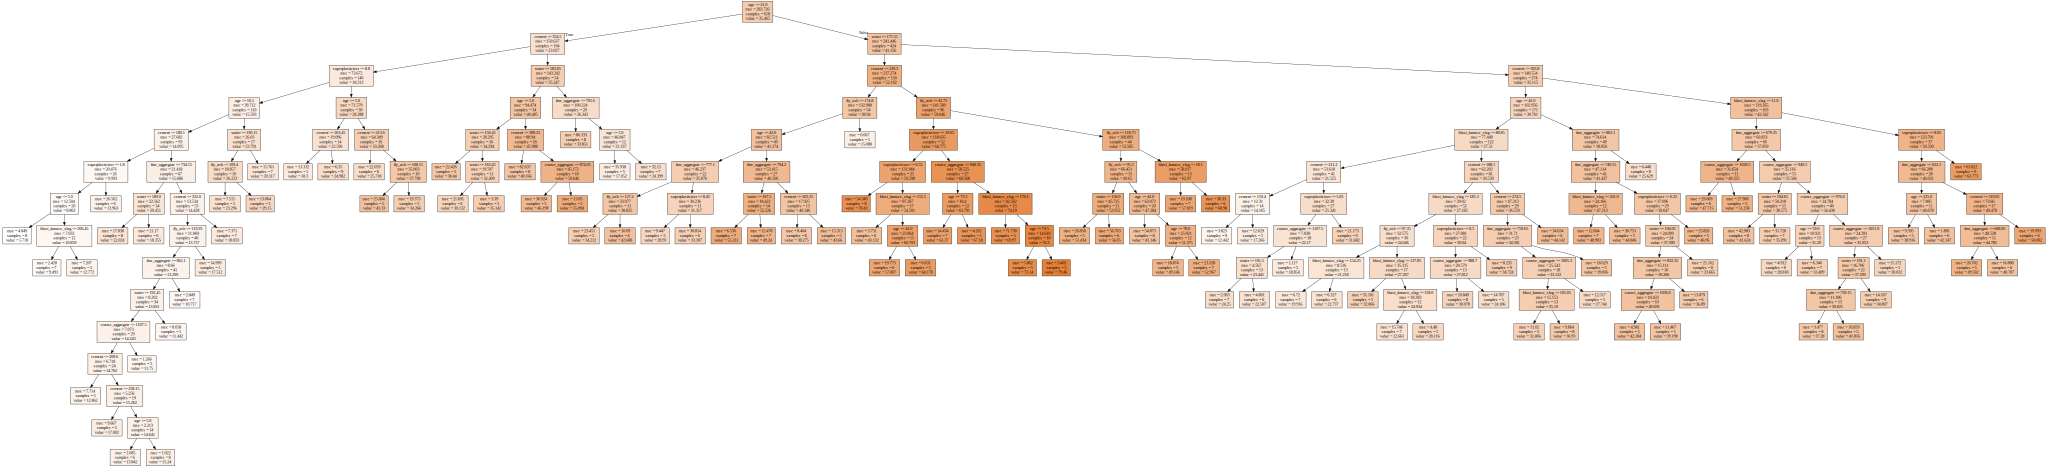

In [37]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 노드의 최소 자료 수 = 5 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=5)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

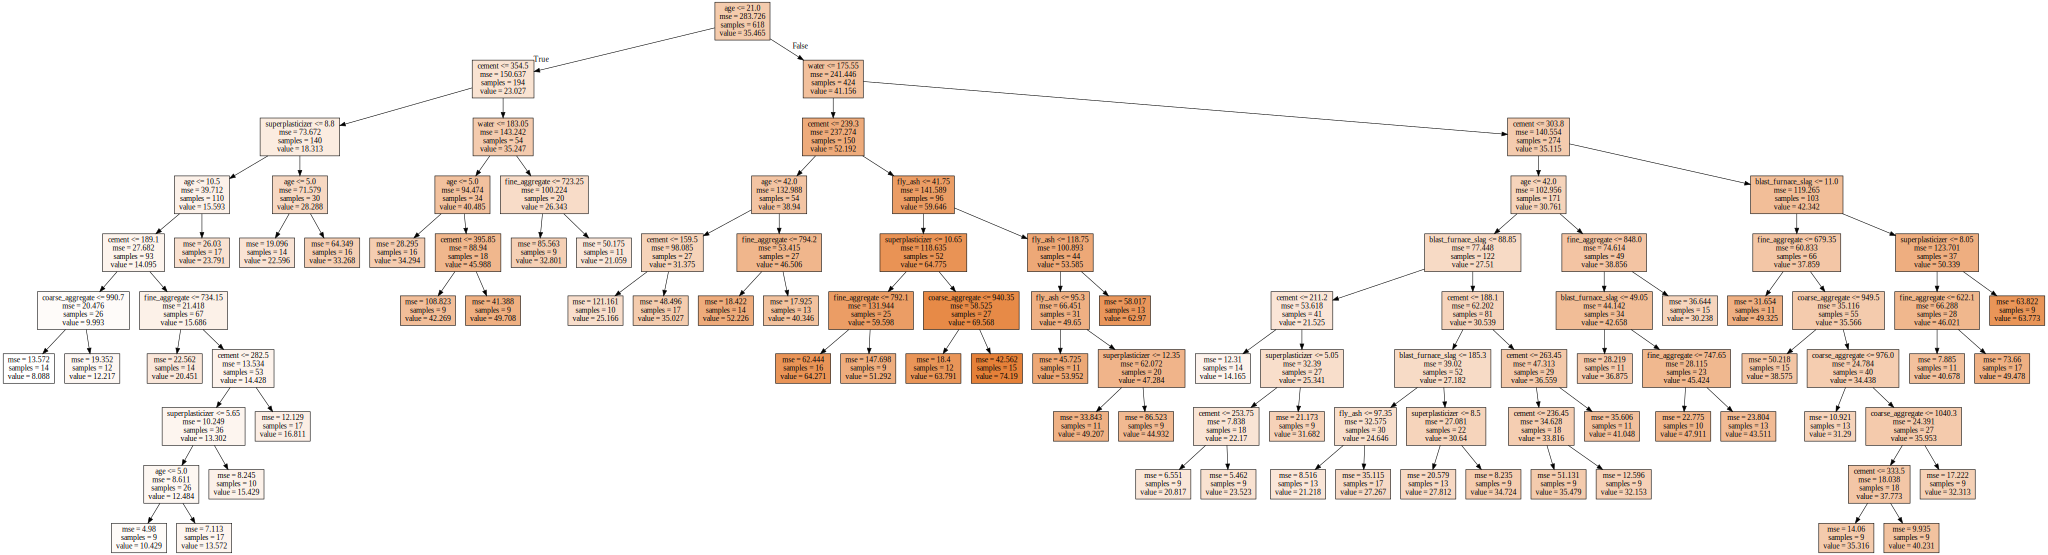

In [38]:
# 노드의 최소 자료 수 = 9 모델
tree_graph = DecisionTreeRegressor(random_state=12334, min_samples_leaf=9)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

자료수가 9가 균형적으로 분리된다. 

### * min_sample_split: 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [39]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []
# min_samples_split: 잎사귀 최소 자료수
para_split = [n_split* 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.900,0.792
1,6,0.900,0.792
2,8,0.900,0.792
3,10,0.900,0.792
4,12,0.900,0.792
5,14,0.900,0.792
6,16,0.900,0.792
7,18,0.887,0.798
8,20,0.882,0.802
9,22,0.874,0.802


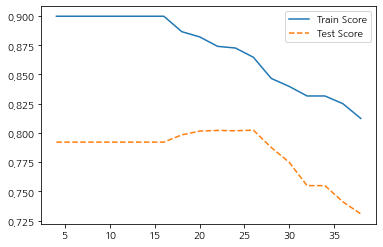

In [40]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label ="Train Score")
plt.plot(para_split, test_score, linestyle = "--", label ="Test Score")
plt.legend()

-> 분리 노드의 최소 자료 수 증가에 따라 모델의 설명력은 감소하며  
-> Train/Test 데이터의 성능 변화를 고려하여 20을 선택

* 분리 노드의 최소 자료 수 변경 결과 비교 (20 vs 26)

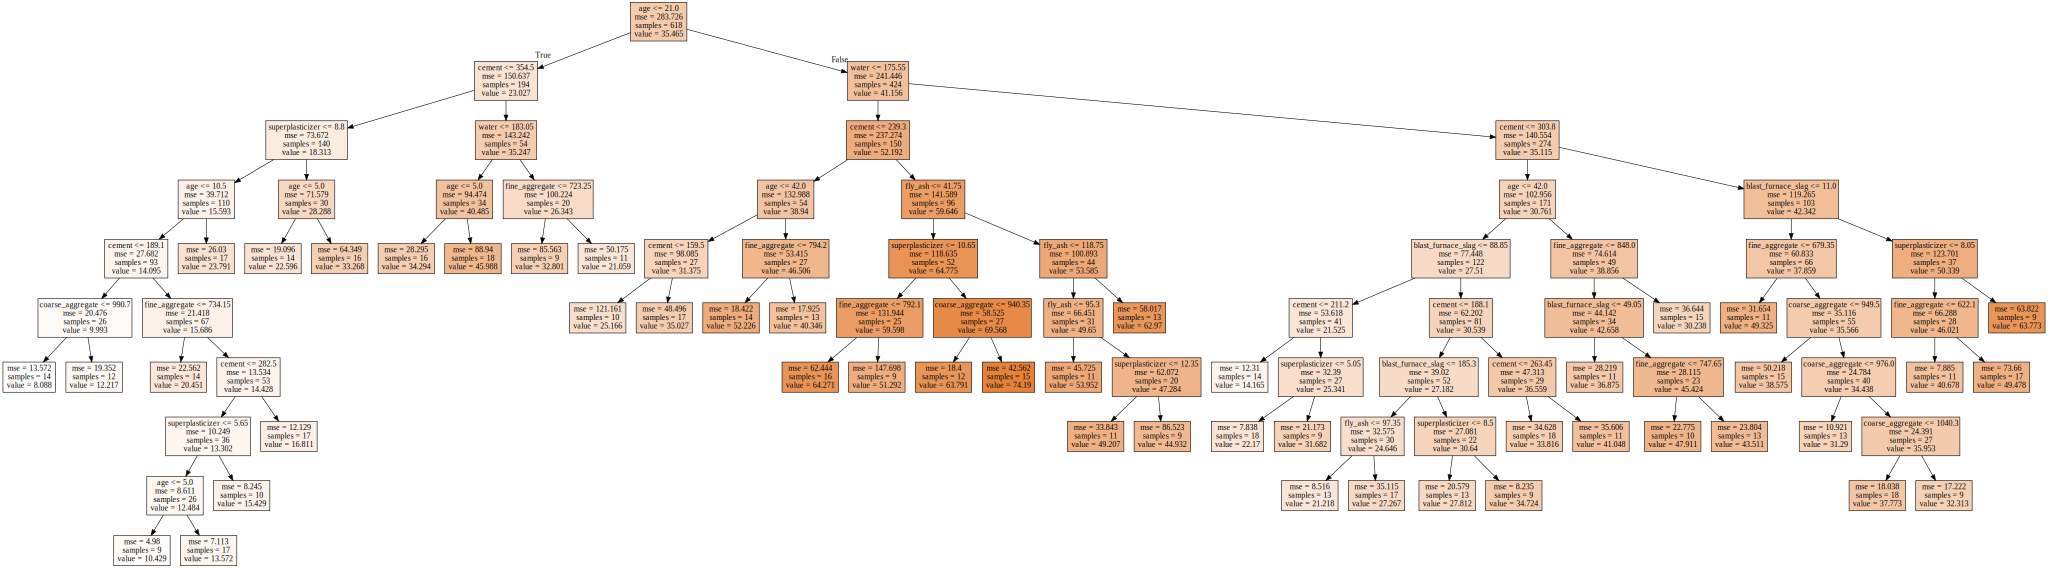

In [42]:
# 분리 노드의 최소 자료 수 = 20 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

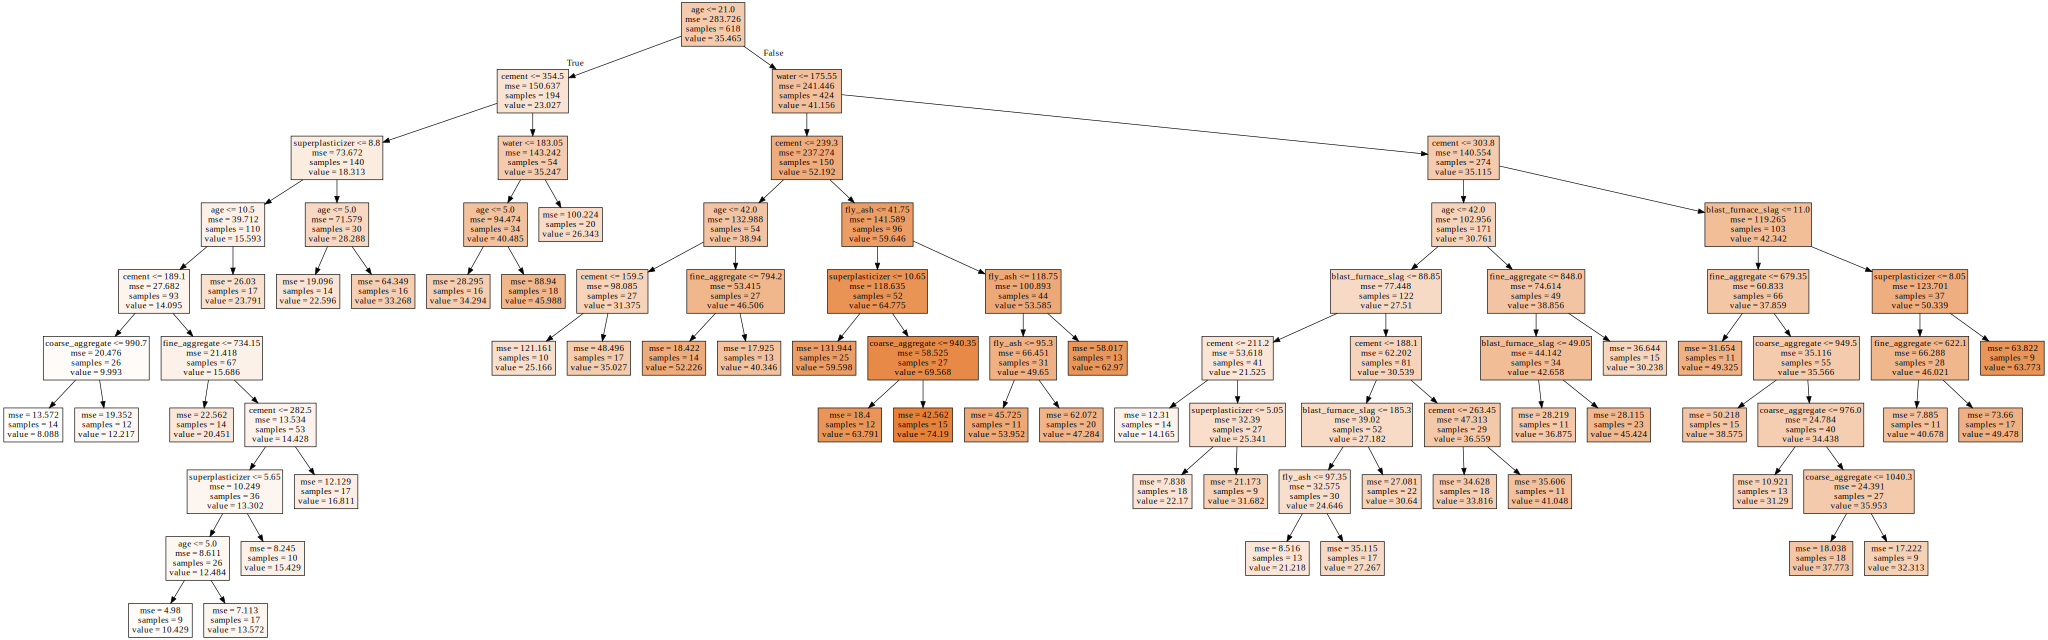

In [43]:
# 분리 노드의 최소 자료 수 = 26 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=26)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

-> 자료 수 26은 과소적합(분리)

### * max_depth: 최대 깊이 변경에 따른 모델 성능

In [44]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.900,0.792
1,6,0.900,0.792
2,8,0.900,0.792
3,10,0.900,0.792
4,12,0.900,0.792
5,14,0.900,0.792
6,16,0.900,0.792
7,18,0.887,0.798
8,20,0.882,0.802
9,22,0.874,0.802


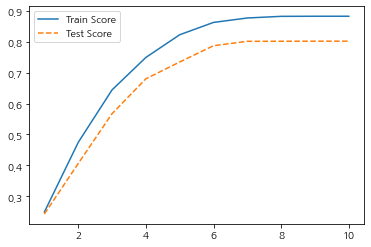

In [45]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label ="Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label ="Test Score")
plt.legend()

-> 최대9 깊이 증가에 따라 모델의 설명력은 증가하며  
-> Train/Test 데이터의 성능 변화를 고려하여 6 선택

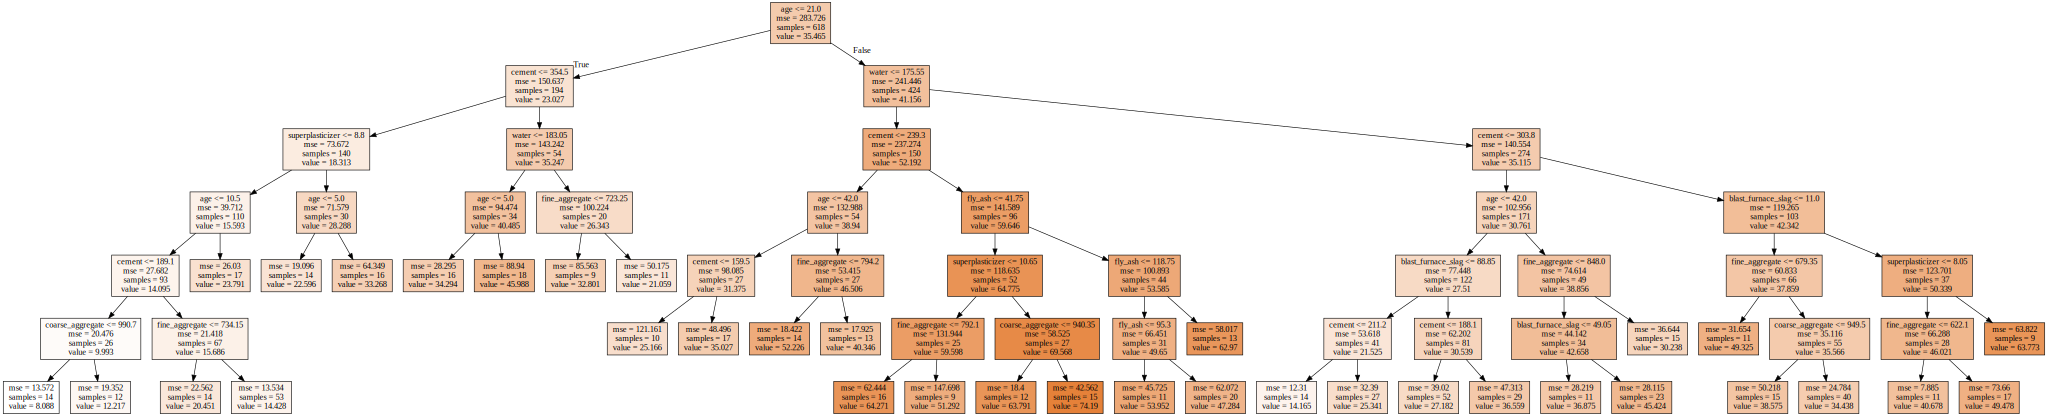

In [46]:
# 최대 깊이 = 6 모델
tree_graph = DecisionTreeRegressor(random_state=12334, min_samples_leaf=9, min_samples_split=20, max_depth=6)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

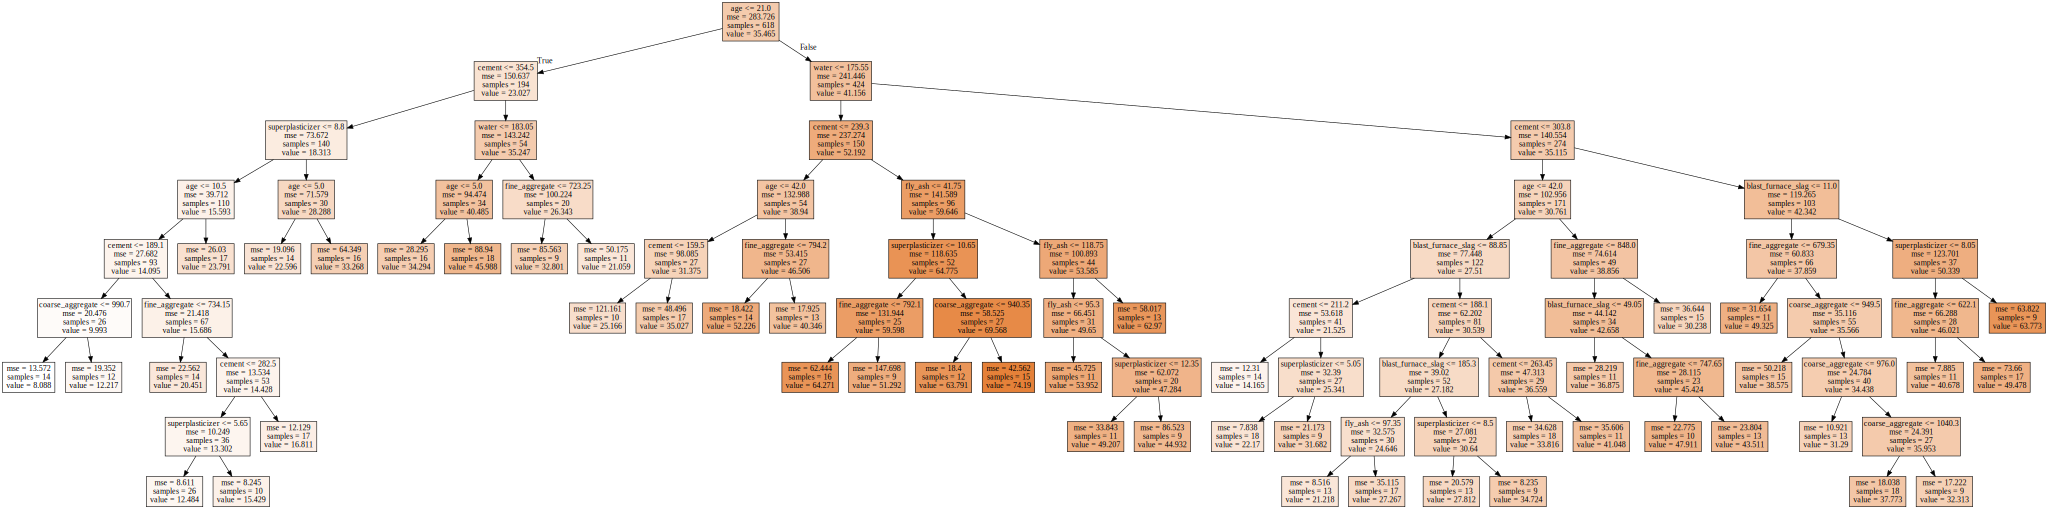

In [47]:
# 최대 깊이 = 8 모델
tree_graph = DecisionTreeRegressor(random_state=12334, min_samples_leaf=9, min_samples_split=20, max_depth=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

max_depth: 최대 깊이 변경에 따른 모델 성능: 깊이 6는 과소적합(분리 노드 수가 적음)

## 최종 모델 선정

In [48]:
tree_final = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=20, max_depth=8)
tree_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.874
Score on test set: 0.817


### 최종 모델 시각화

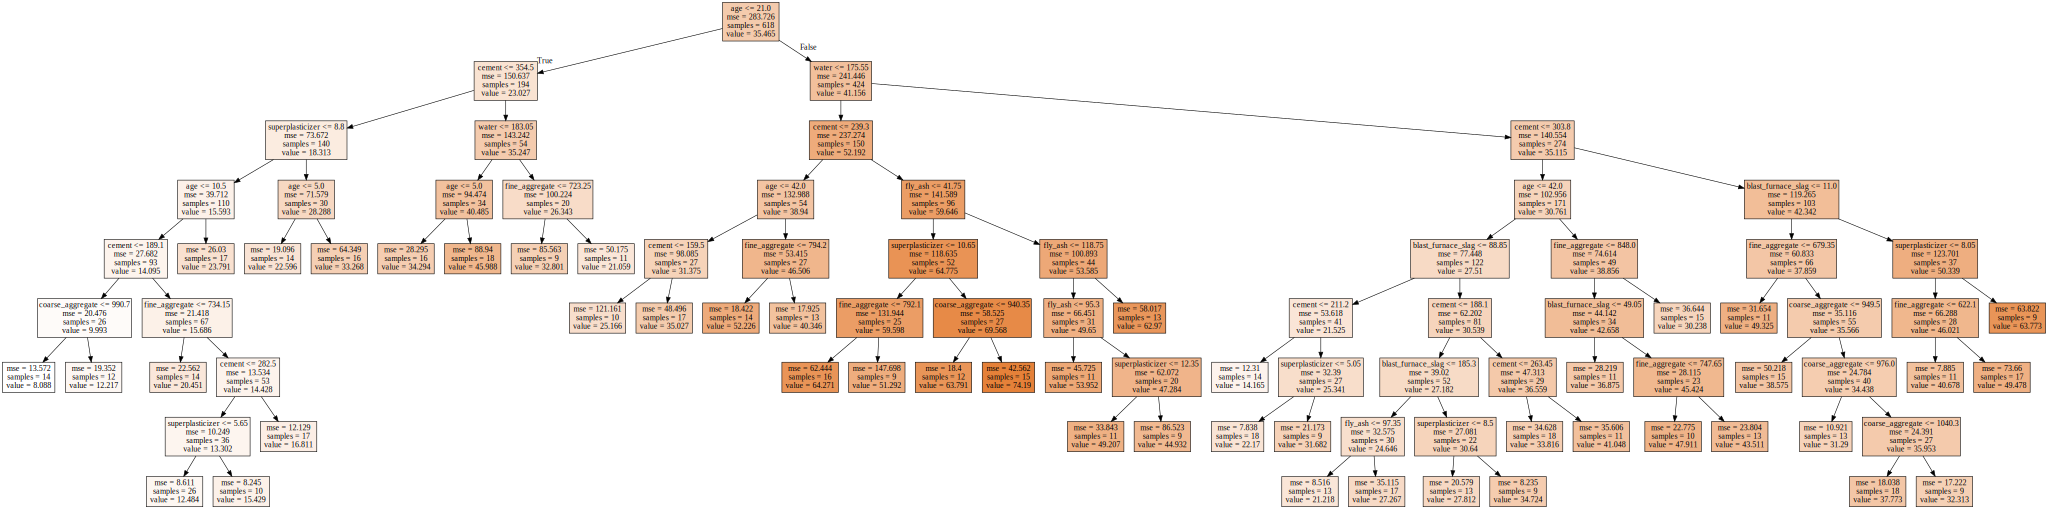

In [49]:
export_graphviz(tree_final, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

-> 최대 깊이가 증가하면서 잎사귀의 자료수가 감소하고 MSE가 지속적으로 감소한다,  
Strength는 분리조건에 따라 상위 노드 대비 증가하거나 감소함

feature_importances_: 설명변수의 중요도

In [76]:
# tree, feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,age,0.357
0,cement,0.255
3,water,0.201
4,superplasticizer,0.053
6,fine_aggregate,0.046
1,blast_furnace_slag,0.045
2,fly_ash,0.034
5,coarse_aggregate,0.009


Text(0, 0.5, '변수')

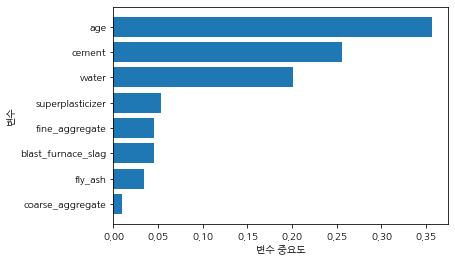

In [77]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

-> 중요 설명 변수: age, cement, water 순으로 영향이 크다고 해석할 수 있음  
-> 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있음

### 최종 모델에대한 mse와 mae 산출 및 비교

In [88]:
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=20, max_depth=8)
dt_model.fit(df_train_x,df_train_y)
dt_y_pred = dt_model.predict(df_test_x)
mse = mean_squared_error(df_test_y,dt_y_pred)
mae = mean_absolute_error(df_test_y,dt_y_pred)
print("의자결정나무 mse: ", mse)
print("의자결정나무 mae: ", mae)

의자결정나무 mse:  49.525879587212984
의자결정나무 mae:  5.39885913211495


# 랜덤 포레스트_ 예측

콘크리트 강도를 예측하는 랜덤 포레스트 모델을 만들고 predict method를 이용하여 예측값을 구하라.  
그리고 모델의 mse와 mae를 산출하여 비교하라.  
데이터 : Concrete.CSV(변수: 9개, 자료 수: 1,030개)  
 -.목표변수(strength)  


※ 데이터는 (train(0.6) : test(0.4) )의 비율로 분할 (train_test_split 활용)  
 1. train 데이터: 모델 훈련   
 2. test 데이터: 1에서 개발한 모델의 성능 평가  


In [58]:
#  engine: 파일명 또는 데이터에 한글 포험 -> 'python'
df_raw = pd.read_csv("./data/Concrete.csv", engine = 'python')
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [59]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw["strength"]
df_raw_x = df_raw.drop("strength", axis = 1, inplace = False)

###  * 데이터 분할 (train, test 데이터를 6:4으로 분리)

In [60]:
# train_test_split (X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x,df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4 , random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (618, 8)
train data Y size : (618,)
test data X size : (412, 8)
test data Y size : (412,)


### - 기본 옵션으로 모델 생성

In [61]:
rf_uncustomized = RFR(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.980
Score on test set: 0.904


### - Test 데이터도 높은 설명력을 가지고 있음

### -n_estimators : 트리 수 변경에 따른 모델 성능

In [62]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []

# n_estimators 트리 수 변경 1~100
para_n_tree = [n_tree* 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RFR(random_state=1234, n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["MinSamplesSplit"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
# 모델 설명력 확인
df_score_n.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,10,0.973,0.905
1,20,0.978,0.905
2,30,0.979,0.903
3,40,0.979,0.905
4,50,0.980,0.905
5,60,0.980,0.906
6,70,0.980,0.906
7,80,0.980,0.906
8,90,0.980,0.905
9,100,0.980,0.904


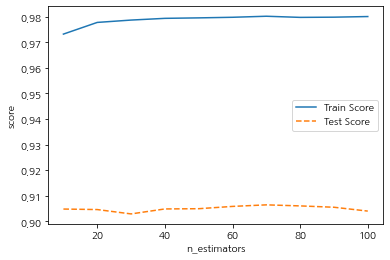

In [63]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label ="Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label ="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

-> 생성하는 결정 트리 수 증가에 따라 모델의 설명력은 증가하며  
-> 트리 수가 30개를 초과해도 설명력은 거의 향상되지 않음  
-> 최대 트리 수에 따른 영향을 배제하고 다른 파라미터의 영향을 확인하고자 100을 선택

### -min_samples_leaf: 잎사귀 노드의 쵯고 자료 수 변경에 따른 모델 성능

In [64]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []
# min_samples_leaf: 잎사귀 최소 자료수
para_leaf = [n_leaf* 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RFR(random_state=1234, min_samples_leaf=v_min_samples_leaf, n_estimators = 100)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesSplit"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,1,0.980,0.904
1,2,0.967,0.900
2,3,0.953,0.893
3,4,0.939,0.882
4,5,0.926,0.872
5,6,0.915,0.862
6,7,0.904,0.854
7,8,0.896,0.848
8,9,0.888,0.838
9,10,0.878,0.827


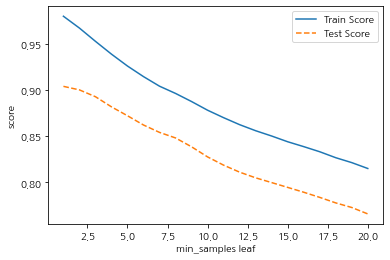

In [65]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label ="Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label ="Test Score")
plt.ylabel("score")
plt.xlabel("min_samples leaf")
plt.legend()

잎사귀 노드 수가 증가할 수록 train/test 설명력이 둘다 감소하므로
잎사귀 노드는 1 선택

In [68]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []
# min_samples_split: 분리 잎사귀 최소 자료수
para_split = [n_split* 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf= RFR(random_state=1234, min_samples_leaf=1, n_estimators = 100, min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.975,0.902
1,6,0.968,0.899
2,8,0.960,0.894
3,10,0.951,0.887
4,12,0.942,0.882
5,14,0.933,0.875
6,16,0.926,0.869
7,18,0.918,0.862
8,20,0.910,0.854
9,22,0.903,0.847


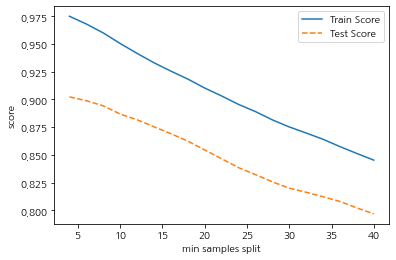

In [69]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label ="Train Score")
plt.plot(para_split, test_score, linestyle = "--", label ="Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

분리 노드 수가 증가할 수록 train/test 설명력이 둘다 감소하므로 잎사귀 노드는 4 선택

### max depth: 최대 깊이 변경에 따른 모델 성능

In [70]:
# train 및 test 설명력 결과 저장
train_score = []
test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf= RFR(random_state=1234, min_samples_leaf=1, n_estimators = 100, min_samples_split = 4,
                   max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.337,0.329
1,2,0.619,0.595
2,3,0.743,0.700
3,4,0.824,0.779
4,5,0.889,0.839
5,6,0.926,0.870
6,7,0.948,0.884
7,8,0.961,0.894
8,9,0.968,0.899
9,10,0.972,0.901


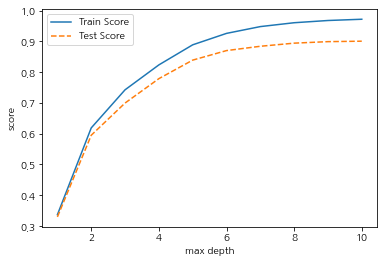

In [71]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label ="Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label ="Test Score")
plt.ylabel("score")
plt.xlabel("max depth")
plt.legend()

-> 최대 깊이 증가에 따라 모델의 설명력은 증가하며
-> Train/Test 데이터의 정확도 변화를 고려하여 6 를 선택

결론도출 - 최종 모델 생성

In [72]:
rf_final = RFR(random_state=1234, min_samples_leaf=1, n_estimators = 100, min_samples_split = 4,
                   max_depth = 6)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

rf_final

Score on training set: 0.926
Score on test set: 0.870


RandomForestRegressor(max_depth=6, min_samples_split=4, random_state=1234)

-> 기본옵션의 test set이 더 높은 설명력은 나타냄 -> 기본옵션의 모델을 선택

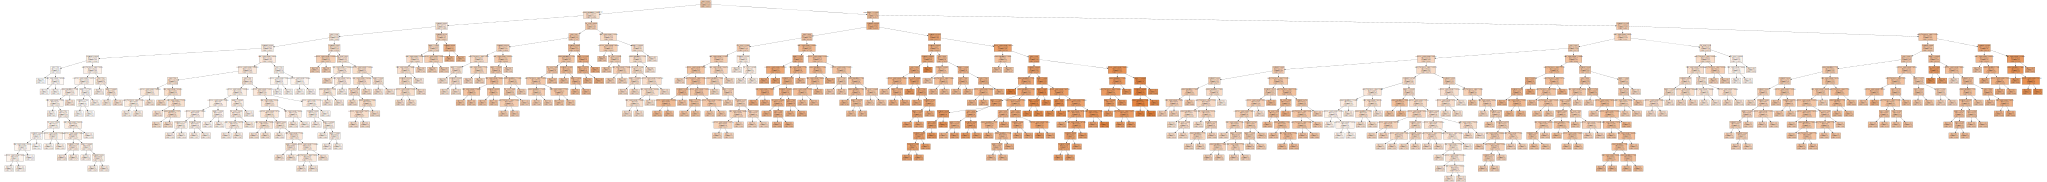

In [73]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 0번 트리
export_graphviz(rf_uncustomized.estimators_[0], out_file = "rf_uncustomized.dot",
               feature_names = v_feature_name, impurity=True, filled=True)
with open("rf_uncustomized.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [74]:
# tree, feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_uncustomized.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,age,0.342
0,cement,0.261
3,water,0.150
4,superplasticizer,0.085
1,blast_furnace_slag,0.051
6,fine_aggregate,0.048
5,coarse_aggregate,0.039
2,fly_ash,0.024


Text(0, 0.5, '변수')

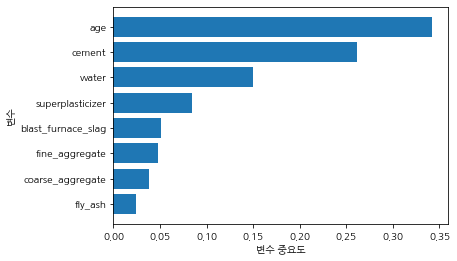

In [75]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

-> 중요 설명 변수: age, cement, water 순으로 영향이 크다고 해석할 수 있음  
-> 단, 계산된 변수 중요도 값이 낮거나 0이더라도 선택되는 데이터에 따라 중요도가 변경될 수 있음

### 최종 모델에 대한 mse와 mae 산출 및 비교

In [89]:
dt_model = RFR(random_state = 1234)
dt_model.fit(df_train_x,df_train_y)
dt_y_pred = dt_model.predict(df_test_x)
mse = mean_squared_error(df_test_y,dt_y_pred)
mae = mean_absolute_error(df_test_y,dt_y_pred)
print("랜덤포레스트 mse: ", mse)
print("랜덤포레스트 mae: ", mae)

랜덤포레스트 mse:  26.016840484014423
랜덤포레스트 mae:  3.7265396312991204
